<a href="https://colab.research.google.com/github/ana-ra/Imers-o-de-dados---Alura/blob/main/Projeto_Machine_Learning_a_drug_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as ferramentas que serao utilizadas para os tratamentos de dados 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#dados que serão utilizados para as analises 
dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

dados = pd.read_csv(dados, compression = 'zip')
dados_resultados = pd.read_csv(dados_resultados)

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [ ]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [ ]:
#Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0.
print(dados_resultados['vitamin_b'].unique())
print(dados_resultados['acat_inhibitor'].unique())

[0 1]
[0 1]


In [ ]:
# determinando quantas vezes cada mecanismo foi ativado 

moa = pd.DataFrame(dados_resultados.drop('id', axis = 1).sum().sort_values(ascending=False))
moa.reset_index(level=0, inplace=True) 
moa.columns = ['moa', 'indice_ativacao']
moa

,moa,indice_ativacao
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404
...,...,...
201,protein_phosphatase_inhibitor,6
202,autotaxin_inhibitor,6
203,diuretic,6
204,erbb2_inhibitor,1


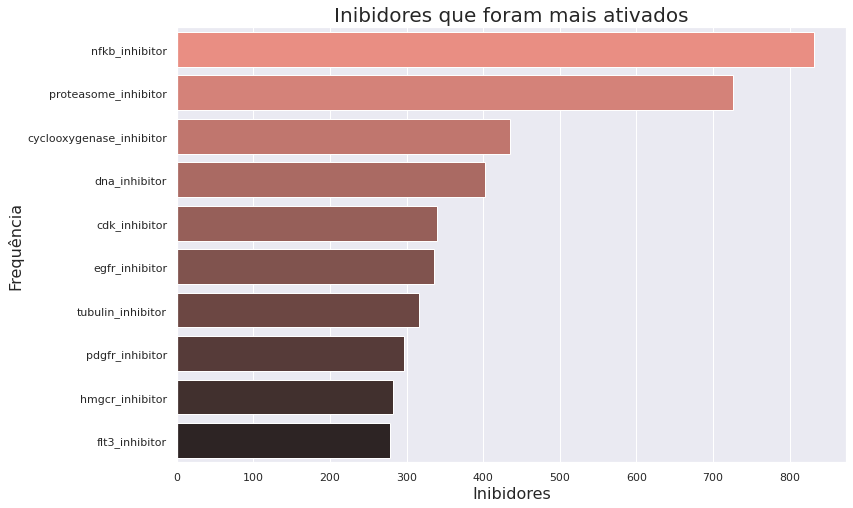

In [ ]:
#Vamos agora explorar os resulados e vamos também determinar os mecanismos inibidores que foram ativados.
inibidores = moa[moa['moa'].str.contains('inhibitor')] 

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'indice_ativacao', y = 'moa' , data = inibidores.iloc[:10], palette='dark:salmon_r', capsize=.2)

ax.set_title('Inibidores que foram mais ativados', fontsize = 20, )
ax.set_xlabel('Inibidores', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)
plt.show()

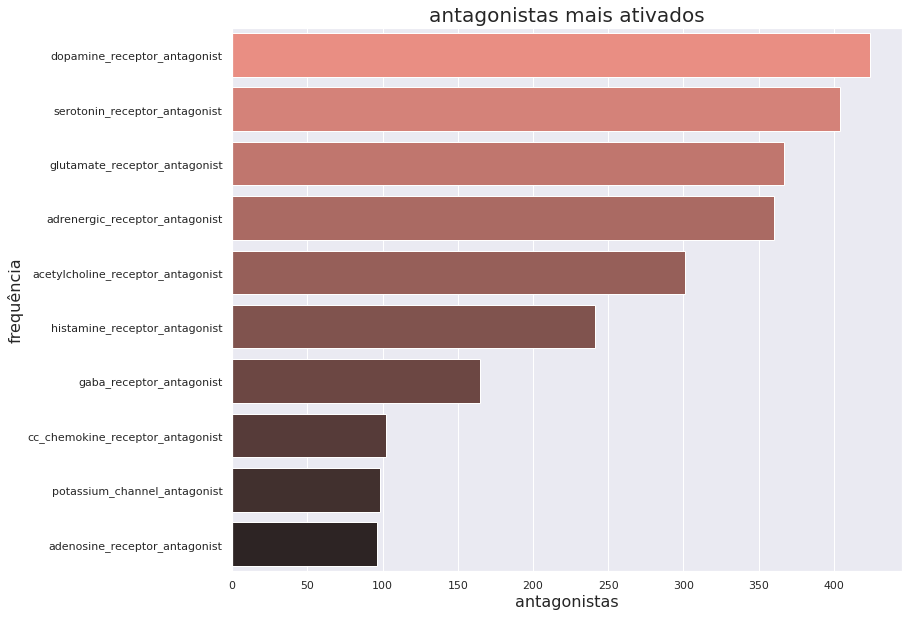

In [ ]:
#Explorando o conjunto dos resultados e determinando quais os mecanismos que são classificados como atagonistas que foram mais ativados. 
ant = moa[moa['moa'].str.contains('antagonist')]

plt.figure(figsize = (12,10))
ax = sns.barplot(x = 'indice_ativacao', y = 'moa' , data = ant.iloc[:10], palette='dark:salmon_r')

ax.set_title('antagonistas mais ativados', fontsize = 20, )
ax.set_xlabel('antagonistas', fontsize = 16)
ax.set_ylabel('frequência', fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


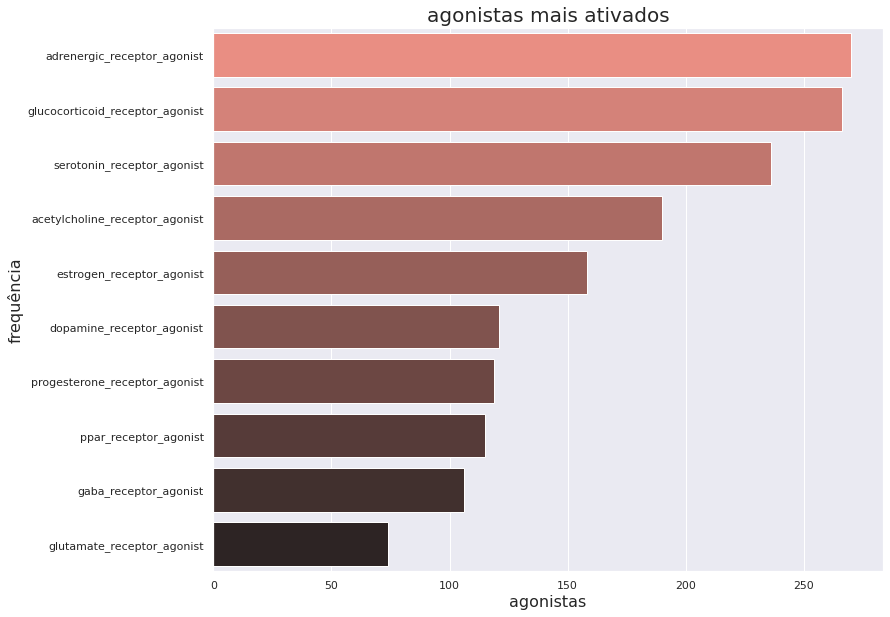

In [ ]:
agonistas = moa[moa['moa'].str.contains('agonist')]
index_antagonistas = (agonistas[agonistas['moa'].str.contains('antagonist')]).index
agonistas.drop(index_antagonistas, inplace = True)

plt.figure(figsize = (12,10))
ax = sns.barplot(x = 'indice_ativacao', y = 'moa' , data = agonistas.iloc[:10], palette='dark:salmon_r')

ax.set_title('agonistas mais ativados', fontsize = 20, )
ax.set_xlabel('agonistas', fontsize = 16)
ax.set_ylabel('frequência', fontsize = 16)
plt.show()

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('default')

In [ ]:
dados_resultados.drop('id', axis = 1).sum(axis =1)
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis =1)

dados_resultados['n_moa'] != 0
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

df = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on = 'id')
df

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.23

In [ ]:
#Aqui usamos o retorno true/false para saber se houve ou não uma ativação em cada experimento realizado,
# salvamos essa série em uma coluna no nosso conjunto resultados e criamos um conjunto através da combinação entre os conjuntos: dados e resultados.
df['eh_controle'] = (df['tratamento'] != 'com_composto')

df['tempo_24'] = (df['tempo'] == 24)
df['tempo_48'] = (df['tempo'] == 48)
df['tempo_72'] = (df['tempo'] == 72)

print('controle \n', df.query('composto == "cacb2b860"' )['id'].count())
print('\n composto 87d714366 \n', df.query('composto == "87d714366"' )['id'].count())
print('\n composto 9f80f3f77 \n', df.query('composto == "9f80f3f77"' )['id'].count())
print('\n composto 8b87a7a83 \n', df.query('composto == "8b87a7a83"' )['id'].count())
print('\n composto 5628cb3ee \n', df.query('composto == "5628cb3ee"' )['id'].count())

controle 
 1866

 composto 87d714366 
 718

 composto 9f80f3f77 
 246

 composto 8b87a7a83 
 203

 composto 5628cb3ee 
 202


In [ ]:
#Criamos também uma nova coluna para "eh_contro", criamos três colunas para indicar as separações temporais(72, 48, 24)
# e vizualizando o número de ocorrências dos 4 compostos mais o controle.
print('controle \n', df.query('composto == "cacb2b860"' )['ativo_moa'].value_counts())
print('\n composto 87d714366 \n', df.query('composto == "87d714366"' )['ativo_moa'].value_counts())
print('\n composto 9f80f3f77 \n', df.query('composto == "9f80f3f77"' )['ativo_moa'].value_counts())
print('\n composto 8b87a7a83 \n', df.query('composto == "8b87a7a83"' )['ativo_moa'].value_counts())
print('\n composto 5628cb3ee \n', df.query('composto == "5628cb3ee"' )['ativo_moa'].value_counts())

print('\033[1m' + '\n Verificamos que há ativação de ao menos um mecanismo em todos os compostos analisados e em todas suas ocorrências' + '\033[1m')

controle 
 False    1866
Name: ativo_moa, dtype: int64

 composto 87d714366 
 True    718
Name: ativo_moa, dtype: int64

 composto 9f80f3f77 
 True    246
Name: ativo_moa, dtype: int64

 composto 8b87a7a83 
 True    203
Name: ativo_moa, dtype: int64

 composto 5628cb3ee 
 True    202
Name: ativo_moa, dtype: int64

 Verificamos que há ativação de ao menos um mecanismo em todos os compostos analisados e em todas suas ocorrências


In [ ]:
composto_principal = df['composto'].value_counts().index[:5]
x = df[df['n_moa'] > 1].query('composto in @composto_principal')

print('\n composto 87d714366 \n', x.query('composto == "87d714366"').shape[0])
print('\n composto 9f80f3f77 \n', x.query('composto == "9f80f3f77"').shape[0])
print('\n composto 8b87a7a83 \n', x.query('composto == "8b87a7a83"').shape[0])
print('\n composto 5628cb3ee \n', x.query('composto == "5628cb3ee"').shape[0])

print('\033[1m' + '\n Verificamos que o composto 87d714366 é o único a ativar mais de um mecanismo e o faz em todas suas ocorrências' + '\033[1m')


 composto 87d714366 
 718

 composto 9f80f3f77 
 0

 composto 8b87a7a83 
 0

 composto 5628cb3ee 
 0

 Verificamos que o composto 87d714366 é o único a ativar mais de um mecanismo e o faz em todas suas ocorrências


In [ ]:
# criando colunas contendo, respectivamente: as médias de expressão gênica e viabilidade celular

colunas_g = df.iloc[:, 5:777].columns
colunas_c = df.iloc[:, 777:877].columns
df['media_g'] = df[colunas_g].mean(axis=1)
df['media_c'] = df[colunas_c].mean(axis=1)

In [ ]:
df.to_csv('dados_drug_discovery.csv', index = False)


In [ ]:
a = df[(df['dose'] == 'D1') & (df['tempo'] == 24)].query('composto in @composto_principal')
b = df[(df['dose'] == 'D1') & (df['tempo'] == 48)].query('composto in @composto_principal')
c = df[(df['dose'] == 'D1') & (df['tempo'] == 72)].query('composto in @composto_principal')
d = df[(df['dose'] == 'D2') & (df['tempo'] == 24)].query('composto in @composto_principal')
e = df[(df['dose'] == 'D2') & (df['tempo'] == 48)].query('composto in @composto_principal')
f = df[(df['dose'] == 'D2') & (df['tempo'] == 72)].query('composto in @composto_principal')

###Analisando a distribuição das médias de expressão gênica e viabilidade celular (D1 e D2 | para 24, 48 e 72 horas respectivamente)

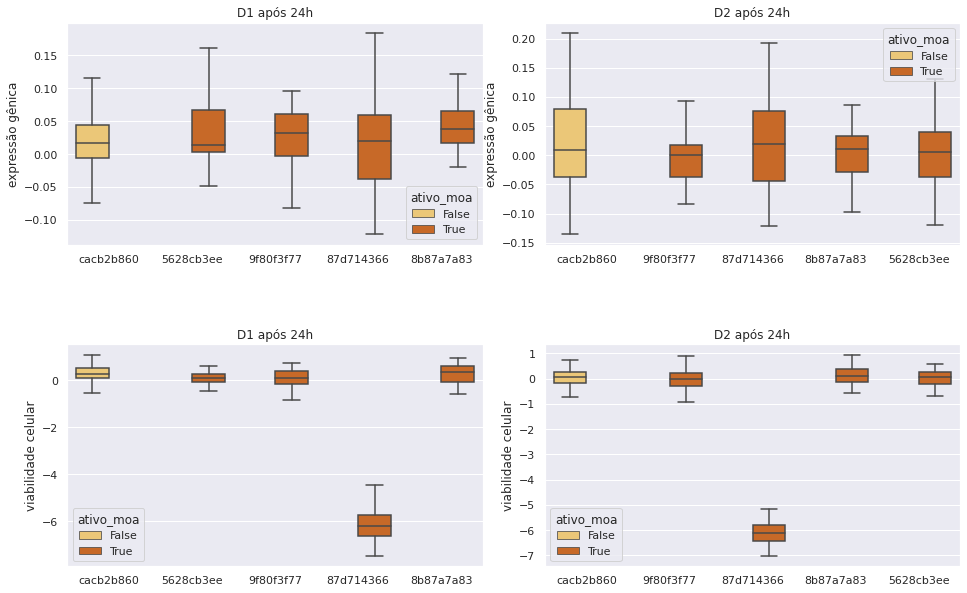

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace = 0.15, hspace = 0.45)
plt.suptitle('')

plt.subplot(2,2,1, title = 'D1 após 24h')
ax1 = sns.boxplot(data = a, y= 'media_g', x='composto', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax1.set_xlabel('')
ax1.set_ylabel('expressão gênica')

plt.subplot(2,2,2, title = 'D2 após 24h')
ax2 = sns.boxplot(data = d, y= 'media_g', x='composto', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax2.set_xlabel('')
ax2.set_ylabel('expressão gênica')

plt.subplot(2,2,3, title = 'D1 após 24h')
ax3 = sns.boxplot(data = a, y= 'media_c', x='composto', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax3.set_xlabel('')
ax3.set_ylabel('viabilidade celular')

plt.subplot(2,2,4, title = 'D2 após 24h')
ax4 = sns.boxplot(data = d, y= 'media_c', x='composto', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax4.set_xlabel('')
ax4.set_ylabel('viabilidade celular')

plt.show()

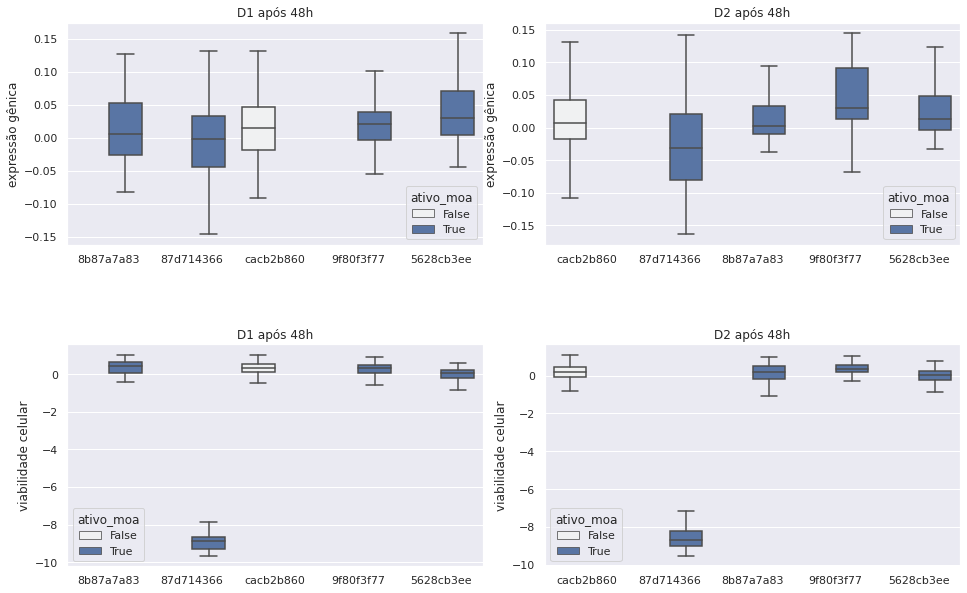

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace = 0.15, hspace = 0.45)
plt.suptitle('')

plt.subplot(2,2,1, title = 'D1 após 48h')
ax1 = sns.boxplot(data = b, y= 'media_g', x='composto', hue='ativo_moa', showfliers = False, palette ='light:b' )
ax1.set_xlabel('')
ax1.set_ylabel('expressão gênica')

plt.subplot(2,2,2, title = 'D2 após 48h')
ax2 = sns.boxplot(data = e, y= 'media_g', x='composto', hue='ativo_moa', showfliers = False, palette ='light:b')
ax2.set_xlabel('')
ax2.set_ylabel('expressão gênica')

plt.subplot(2,2,3, title = 'D1 após 48h')
ax3 = sns.boxplot(data = b, y= 'media_c', x='composto', hue='ativo_moa', showfliers = False, palette ='light:b')
ax3.set_xlabel('')
ax3.set_ylabel('viabilidade celular')

plt.subplot(2,2,4, title = 'D2 após 48h')
ax4 = sns.boxplot(data = e, y= 'media_c', x='composto', hue='ativo_moa', showfliers = False, palette ='light:b')
ax4.set_xlabel('')
ax4.set_ylabel('viabilidade celular')

plt.show()

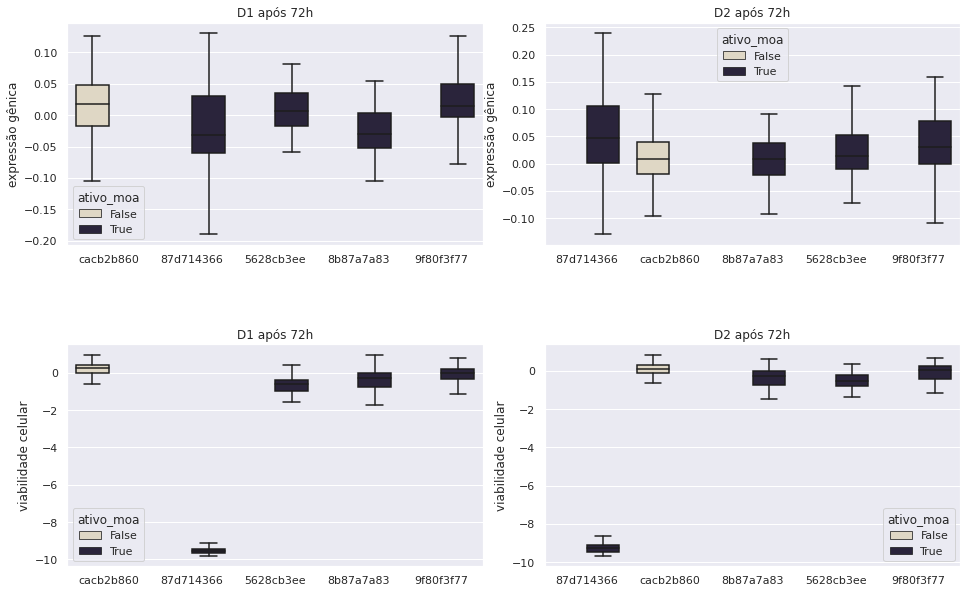

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace = 0.15, hspace = 0.45)
plt.suptitle('')

plt.subplot(2,2,1, title = 'D1 após 72h')
ax1 = sns.boxplot(data = c, y= 'media_g', x='composto', hue='ativo_moa', showfliers = False, palette ='ch:s=-.2,r=.6')
ax1.set_xlabel('')
ax1.set_ylabel('expressão gênica')

plt.subplot(2,2,2, title = 'D2 após 72h')
ax2 = sns.boxplot(data = f, y= 'media_g', x='composto', hue='ativo_moa', showfliers = False,  palette ='ch:s=-.2,r=.6')
ax2.set_xlabel('')
ax2.set_ylabel('expressão gênica')

plt.subplot(2,2,3, title = 'D1 após 72h')
ax3 = sns.boxplot(data = c, y= 'media_c', x='composto', hue='ativo_moa', showfliers = False,  palette ='ch:s=-.2,r=.6')
ax3.set_xlabel('')
ax3.set_ylabel('viabilidade celular')

plt.subplot(2,2,4, title = 'D2 após 72h')
ax4 = sns.boxplot(data = f, y= 'media_c', x='composto', hue='ativo_moa', showfliers = False,  palette ='ch:s=-.2,r=.6')
ax4.set_xlabel('')
ax4.set_ylabel('viabilidade celular')

plt.show()

Observando agora a correlação da viabilidade celular vs expressão gênica: 

*   Correlação negativa
*   Correlação positiva

<Figure size 1152x576 with 0 Axes>

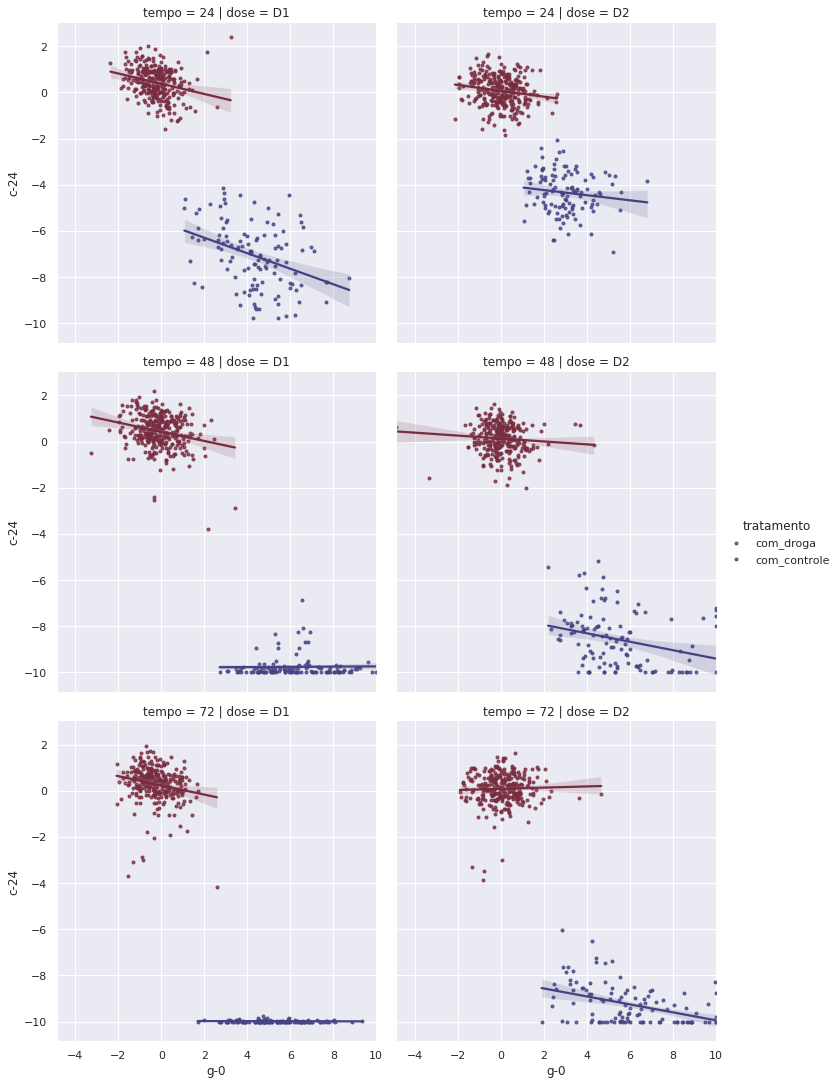

In [ ]:
g = df[(df['composto'] == 'cacb2b860') | (df['composto'] == '87d714366')]
                 
plt.figure(figsize = (16,8))
                 
sns.lmplot(x='g-0', y = 'c-24', data = g, col = 'dose', row = 'tempo',hue = 'tratamento', markers = '.', palette='icefire')

                
plt.show()

<Figure size 1152x576 with 0 Axes>

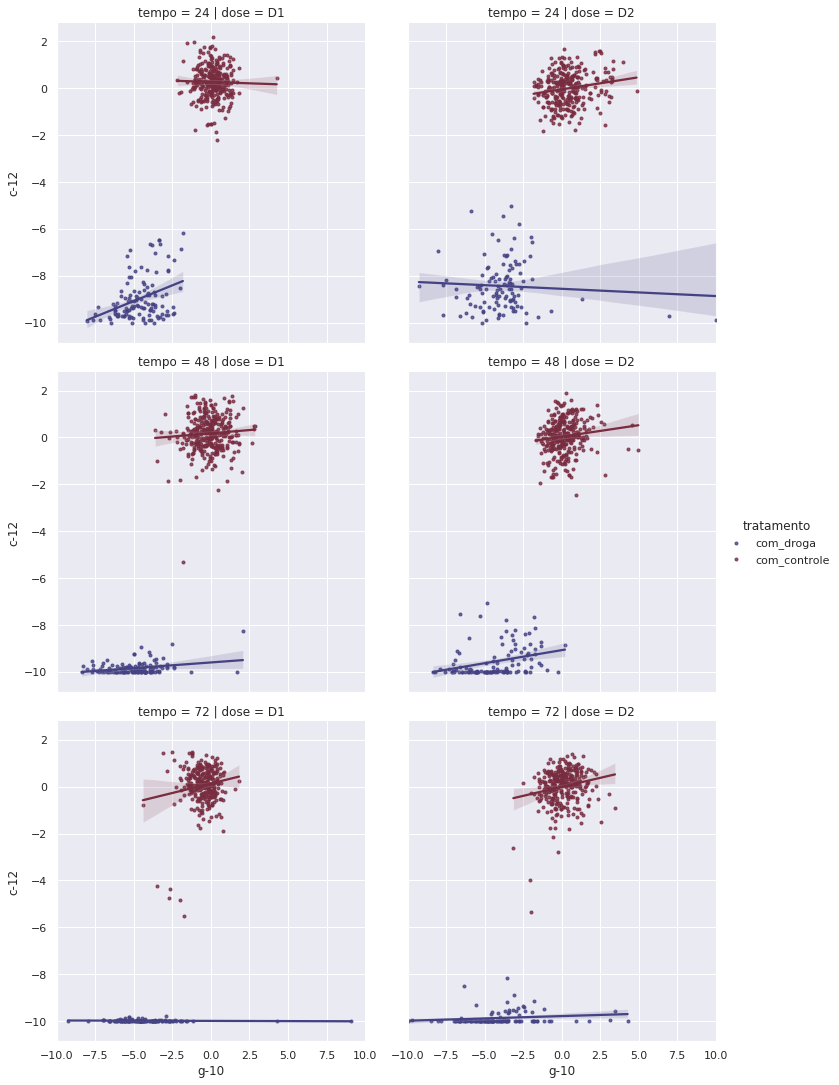

In [ ]:
plt.figure(figsize = (16,8))
sns.lmplot(x='g-10', y = 'c-12', data = g, col = 'dose', row = 'tempo',hue = 'tratamento', markers = '.',palette='icefire')            
plt.show()

In [ ]:
 dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [ ]:
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
#assinatura (váriaveis diferentes)
y = dados_combinados['ativo_moa']
#mecanismo de ação (Se foi ativado ou não) (classificação binaria)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

0.6267058576527399

Para estabelecer se este é um bom valor de acurácia, é preciso de uma base comparativa.

Para isso, o Scikit-Learn, já tem implementado alguns algoritmos que fazer modelos menos complexos e que podem ser usados como base comparativa. Neste caso, vamos usar o ```DummyClassifier```.

O processo para ajustar este modelo é semelhante com o usado pararegressão logística: dividir a base em treino e teste.

Ao instanciar o ```DummyClassifier```, é preciso definir a estratégia que ele usará para fazer o ajuste do modelo. A estratégia será os dados mais frequentes, isso quer dizer que: dado o valor mais frequente da variável resposta (```ativo_moa```), o modelo Dummy vai chutar que todos os eventos da base de dados assumem aquele valor no target. Assim, temos: ```DummyClassifier('most_frequent')```.

Agora para calcular a acurácia, existe  outra estratégia, a função ```accuracy_score``` também do Scikit-Learn. Ela receberá como parâmetros a base teste da variável resposta (```y_teste```) e as previsões do model. 

Para calcular as previsões, é preciso usar o ```.predict()``` da mesma biblioteca que, receberá como parâmetro a base ```x_teste```.
Por fim, o cálculo da acurácia será: 

    previsao_dummy = modelo_dummy.predict(x_teste)
    accuracy_score(y_teste, previsao_dummy)

A acurácia do ```DummyClassifier```foi de ~60,7%, isso significa que o modelo ```LogisticRegression``` teve um desempenho um pouco melhor.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

In [ ]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

####Para utilizar outras informacoes vamos utilizar outro modelo para observação 

In [ ]:
#modelo arvore de decisão 

In [ ]:
#Criando uma variavel para usar na estrutura dos modelos estudados com o intuito de poupar tempo. 

x = dados_combinados.select_dtypes('float64')
#assinatura (váriaveis diferentes)
y = dados_combinados['ativo_moa']
#mecanismo de ação (Se foi ativado ou não) (classificação binaria)
info = x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

dados_base = (x, y, info )


In [ ]:
from sklearn.tree import  DecisionTreeClassifier
dados_base
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6151585135418853

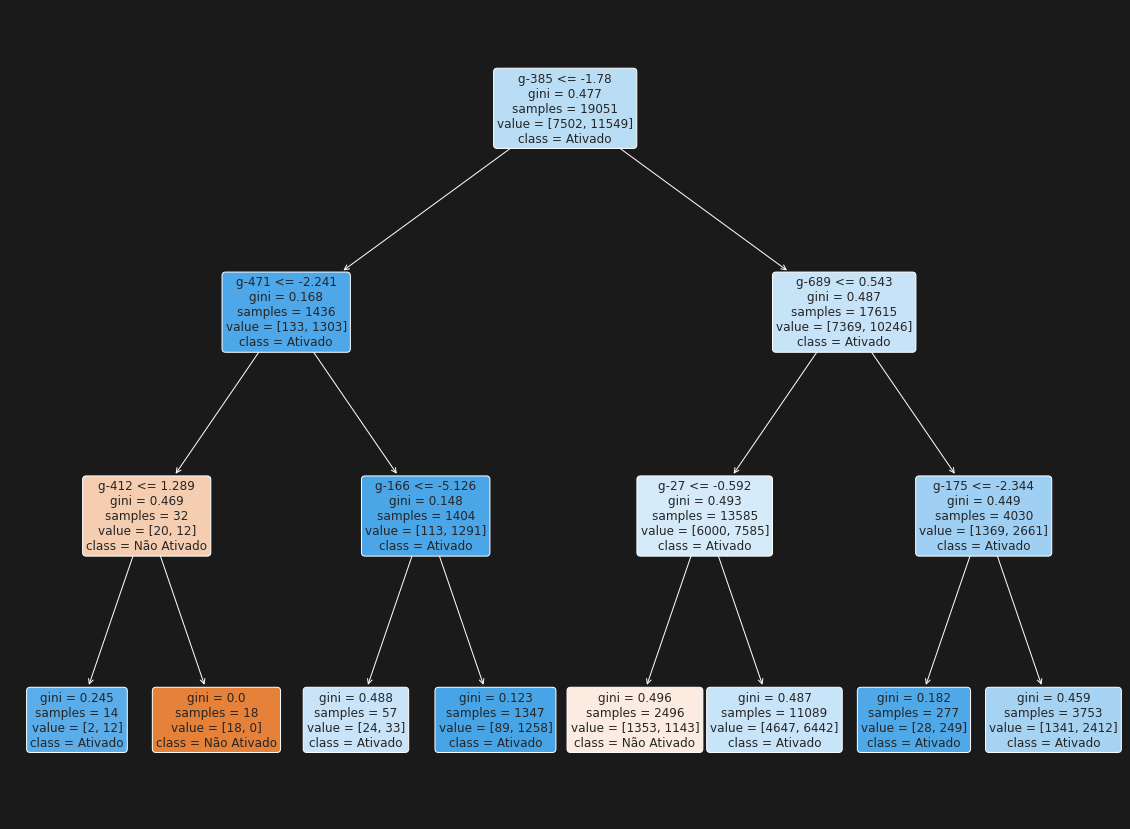

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(20, 15), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=12,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])
plt.show()

In [ ]:
pd.get_dummies(dados_combinados['tratamento'])

In [45]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [46]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6199874028973336,
 0.6206172580306529,
 0.6185177409195884,
 0.6204073063195465,
 0.6206172580306529,
 0.6157883686752047,
 0.6132689481419273,
 0.6122191895863951,
 0.5979424732311568,
 0.5994121352089019,
 0.5958429561200924]

In [47]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6606477350270327,
 0.6707259461445594,
 0.6896225919899218,
 0.7067870452994593,
 0.7294105296309905,
 0.7531363183035011,
 0.776809616293108,
 0.799223137893024]

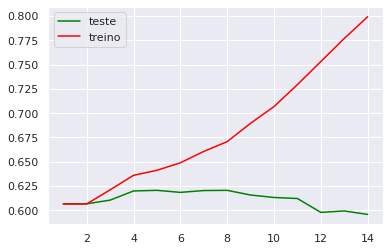

In [50]:
sns.lineplot(x=range(1,15), y = teste, label='teste', color='green')
sns.lineplot(x=range(1,15), y = treino, label='treino', color='red')

No gráfico é possível observar que o valor da acurácia nos dados de teste vão dimuindo, e os dados de treino aumenta. Esse comportamento reflete que quanto mais profunda essa árvore melhor o modelo atende aos dados de treino, porém perde a capacidade de generalização dos dados de testo. Esse efeito é chamado de **overfitting**.

In [56]:
pd.get_dummies(dados_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [57]:
pd.get_dummies(dados_combinados, columns=['dose', 'tratamento', 'tempo'])

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,dose_D1,dose_D2,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,1,0,0,1,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,1,0,0,1,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,1,0,0,1,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,1,0,0,1,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.

In [59]:
dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

,tratamento,tempo,dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,com_droga,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,com_droga,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,com_droga,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,com_droga,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,com_droga,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320

In [60]:
#Vamos utilizar outro modelo para obter um resultado diferente 
from sklearn.ensemble import RandomForestClassifier

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
dados_base
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6802435439848835

####Testando outros modelos de análise para observar a ocorrencia de ativação dos mecanimos de interação  bioquimíca dos compostos estudoados e determinar o modelo mais eficiente com os parametros testados 


In [64]:
#Vamos observar uma mudança no parâmetro de um modelo já utilizado antes. O modelo de regressão logística. 
#Ao mudar o valor do random state e  o parametro que controla a complexidade do modelo teremoss que valores mais baixos indicam que precisamos de um modelo mais elaborado. 

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

#modelo de regressão logística
modelo_rlogistica = LogisticRegression(max_iter=1000, C=8)
#treinando modelo
modelo_rlogistica.fit(x_treino, y_treino)
#score do modelo: como o modelo está se saindo no teste: retorna a acurácia
modelo_rlogistica.score(x_teste, y_teste)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

0.6346840226747849

In [66]:
#Testando o modelo Bayesian Rigde regression em estatística, a regressão linear bayesiana é uma abordagem da regressão linear na qual a análise estatística é realizada dentro do contexto da inferência bayesiana.
from sklearn import linear_model

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa'] 

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,test_size=0.2,stratify=y,random_state=42)
modelo_bayesian = linear_model.BayesianRidge()
modelo_bayesian.fit(x_treino, y_treino)
preds = modelo_bayesian.predict(x_teste, y_teste)
modelo_bayesian.score(x_teste, y_teste)

0.1580082164249076

In [67]:
# Testando um modelo baseado em em aprendizagem por instâncias, esse método consiste em armazenar exemplos de treino. 
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors = 2)
modelo_knn.fit(x_treino, y_treino)
modelo_knn.score(x_teste, y_teste)

0.5677094268318287

In [70]:
# Agora um teste utilizando um modelo de vetor que melhora a performace chamado Support Vector Machine
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100).fit(x_treino, y_treino)
linear_svm.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5612009237875288

**A scikit-learn consiste em uma biblioteca para o aprendizado de máquina. A linguagem principal dos códigos é python. Dentre sua enorme variedade de algoritimos estão algoritimos para classificação, regressão, florestas aleatórias entre outros. Com umma vasta documentação o projeto tem sido de enorme importância para pesquisas em diversas a´reas do conhecimento.**

Muitas vezes, a parte mais difícil de resolver um problema de aprendizado de máquina pode ser encontrar o estimador certo para o trabalho.Estimadores diferentes são mais adequados para diferentes tipos de dados e diferentes problemas.

O fluxograma  projetado para fornecer aos usuários do skcikit-learn um guia básico sobre como abordar problemas com relação a quais estimadores tentar em seus dados.

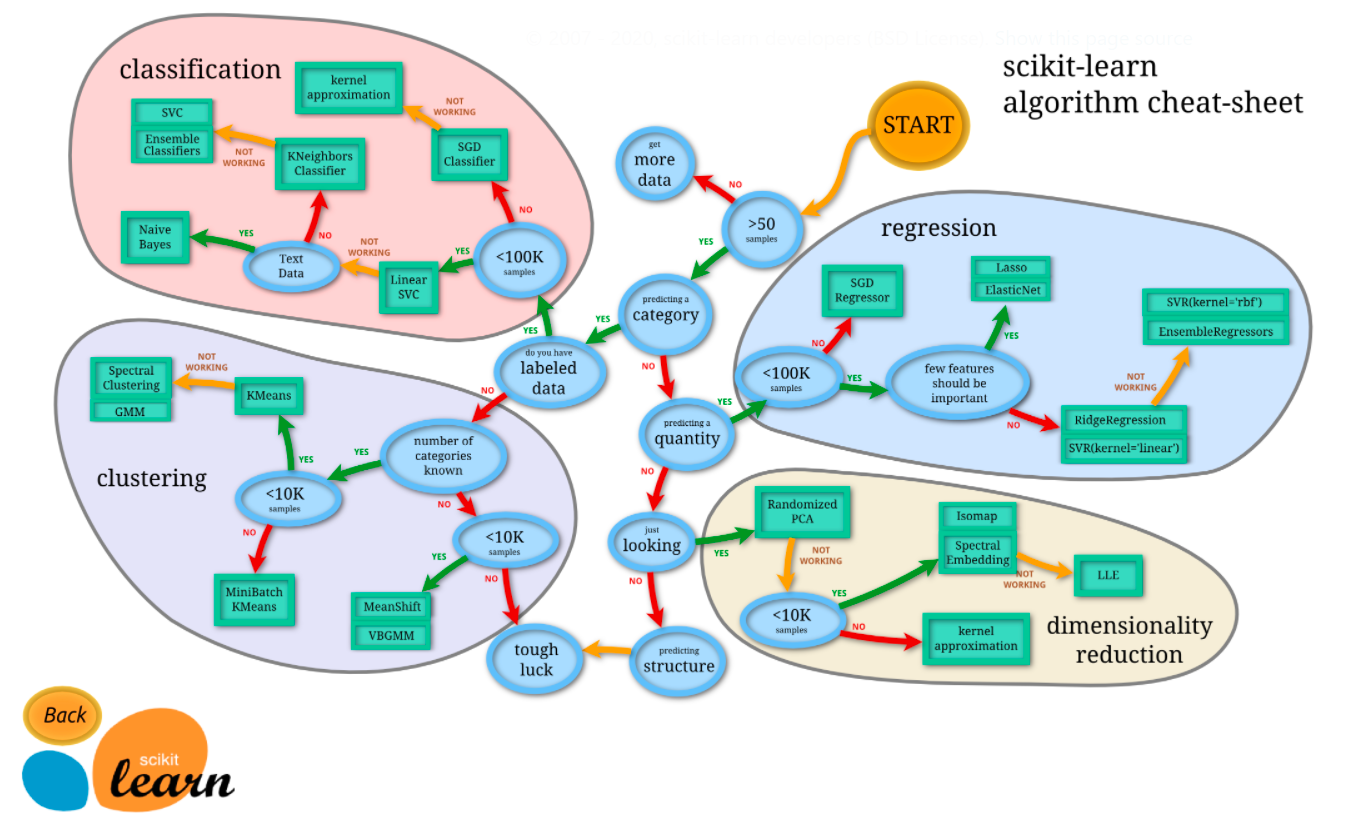


O melhor resultado encontrado foi usando a modelagem SVC. 

### **Testando outros problemas com 0,1 ou +**

In [75]:
dados_combinados['moas_maior_que_1'] = np.where( dados_combinados['n_moa'] > 1, True, False )
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,moas_maior_que_1
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


In [77]:
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['moas_maior_que_1'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.9995800965777871

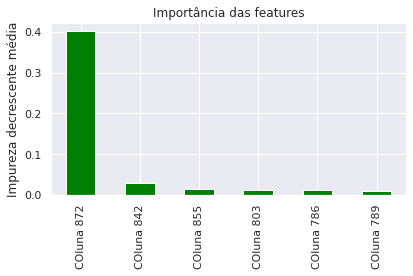

In [79]:

importancias = modelo_randomforest.feature_importances_
features = [f'COluna {i}' for i in range(x.shape[1])]
std = np.std([tree.feature_importances_ for tree in modelo_randomforest.estimators_], axis=0)

import pandas as pd
forest_importances = pd.Series(importancias, index=features).nlargest(6)

fig, ax = plt.subplots()
forest_importances.plot.bar( color='green',ax=ax)
ax.set_title("Importância das features")
ax.set_ylabel("Impureza decrescente média")
fig.tight_layout()

**Usando a droga mais utilizada para criar um modelo para prever está label.**

In [85]:
#retirando variavel tratamento do conjunto de variaveis independentes
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto', 'tratamento'], axis=1)
#variáveis independentes
x = pd.get_dummies(x, columns=['dose', 'tempo'])
#variável dependente
y = dados_combinados['tratamento'] 
#separando dados em treino e teste, teste: 20% e treino: 80%
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.9302960319126601

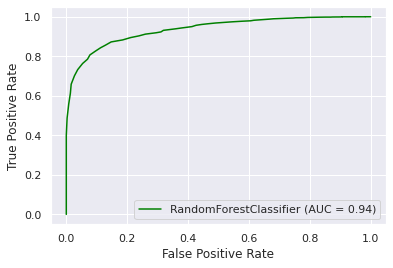

In [88]:
#utilizando curva ROC que determina o desempenho de um modelo de classificação em um valor limite definido. 
from sklearn.metrics import plot_roc_curve
plot_roc_curve(modelo_randomforest, x_teste,y_teste, color='green')
plt.show()

In [87]:
compostos_modelo = dados_combinados['composto'].value_counts().index[1:2] #excluindo a primeira droga que é a de controle
compostos_modelo

Index(['87d714366'], dtype='object')

In [89]:
dados_filtro_composto = dados_combinados.query('composto in @compostos_modelo')
dados_filtro_composto

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,moas_maior_que_1
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.486,-2.5790,-6.747,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.285,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.063,-0.8282,-3.500,0.9206,-5.145,9.804,-2.6840,-2.4390,-0.1427,...,-10.000,-8.511,-10.000,-10.000,-10.000,-10.000,-8.887,-10.000,-10.000,-10.000,-10.000,-4.902,-9.984,-5.552,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.796,-8.177,-9.899,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-6.784,2,True,True
76,id_00cf039a7,com_droga,48,D2,87d714366,4.546,0.4257,0.7670,2.1950,2.5960,0.3677,-0.3854,-1.1590,-8.180,-2.1310,-4.168,2.5630,-1.3410,5.2610,-2.5680,1.0840,-3.835,-4.8440,0.8522,0.2435,-2.6090,0.3067,0.9733,-1.6080,-2.9210,-1.9570,-2.644,2.4030,-3.036,-6.4520,-3.258,4.355,-0.7562,0.9930,-0.2854,...,-9.995,-6.135,-9.986,-8.504,-8.528,-9.995,-6.254,-9.995,-6.955,-9.995,-9.743,-3.457,-8.712,-3.972,-8.709,-10.000,-8.461,-9.347,-8.698,-9.807,-10.000,-10.000,-10.000,-5.657,-5.513,-8.284,-9.490,-8.729,-10.000,-7.834,-9.538,-10.000,-8.520,-10.000,-7.436,-6.918,-5.235,2,True,True
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.3530,-0.9594,2.5600,-3.3120,-9.507,-3.3930,-4.160,-2.9320,0.0000,2.2650,-6.2560,0.1147,-4.209,-3.5580,3.2920,0.1551,-3.7200,0.1069,1.3000,1.9710,-9.9350,-1.8340,-1.072,0.2092,-1.989,-4.0390,-6.047,8.404,3.1040,-3.3390,-2.8780,...,-9.978,-8.823,-9.978,-9.513,-9.832,-9.978,-6.568,-9.978,-8.664,-9.978,-9.978,-4.073,-10.000,-5.163,-7.797,-10.000,-8.297,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.019,-8.688,-9.658,-9.308,-10.000,-10.000,-7.703,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548,2,True,True
209,id_0236e3425,com_droga,72,D1,87d714366,3.612,-1.7130,0.0313,-1.7360,3.3550,-1.7040,2.6010,-1.4530,-9.534,-2.8730,-4.465,-0.4308,-1.7920,3.8900,-3.4910,0.6124,-3.504,-4.4450,-1.4690,-2.8590,-1.4090,0.1560,-3.1610,-1.5710,0.0587,-0.0839,-3.619,-0.2986,-2.164,-2.1390,-3.929,7.451,-1.0450,4.2260,-3.5800,...,-9.974,-9.062,-9.896,-10.000,-9.553,-10.000,-7.088,-10.000,-10.000,-10.000,-10.000,-4.432,-10.000,-6.025,-8.882,-10.000,-8.023,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.517,-7.589,-10.000,-10.000,-10.000,-10.000,-8.451,-10.000,-10.000,-8.695,-10.000,-8.559,-8.025,-6.642,2,True,True
218,id_024a52260,com_droga,24,D2,87d714366,2.119,0.1098,1.1040,5.0620,-0.7427,-0.3564,-0.8253,-3.6180,-1.127,-2.1360,-3.371,5.4820,0.0537,8.0940,-1.3650,-1.4740,-4.195,0.0338,-0.2759,0.3821,-0.6859,-2.6870,0.1784,-1.0710,-4.1710,1.5710,-1.949,-1.0180,-4.791,-5.3540,-5.922,2.569,-1.5100,-2.7960,3.0740,...,-9.313,-2.972,-8.412,-6.681,-7.150,-6.109,-4.503,-10.000,-5.367,-5.762,-5.173,-1.988,-7.265,-6.189,-5.044,-8.035,-4.652,-4.068,-6.564,-5.805,-8.420,-5.524,-6.696,-2.777,-3.348,-4.720,-5.357,-8.619,-7.332,-7.828,-9.679,-8.439,-2.047,-7.430,-5.861,-4.591,-3.533,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,id_fe8abffe0,com_droga,72,D1,87d714366,6.649,-0.4462,1.7370,0.0553,3.0330,-2.7360,0.4016,-4.5340,-9.746,-3.1160,-5.381,2.1980,-1.4490,6.8380,-5.0190,0.7382,-4.690,-4.5760,-1.5880,-3.1120,-5.5090,-1.4490,-2.2670,-1.7240,-1.2190,-2.5050,-5.049,0.9918,-4.635,-1.8910,-3.750,4.339,-0.5515,7.0970,-2.5690,...,-10.000

In [90]:
#retirando variavel tratamento do conjunto de variaveis independentes
x = dados_filtro_composto.drop(['id', 'n_moa', 'ativo_moa', 'composto', 'tratamento'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tempo'])
y = dados_filtro_composto['tratamento']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

1.0

####Vemos aqui que ao utilizar a droga para prever o tratamento o modelo acerta 100% das previsões. 

**Nessa atividade aprendemos os diferentes modelos existentes para analisarmos dados e para a construção de algoritimos em machine learning. Além disso criamos colunas com os dados de outras colunas usando uma função chamada "get_dummies".**